# Importing data


classic 4


In [ ]:
import pandas as pd

#classic4

data_classic4= pd.read_csv('classic4.csv')
texts4 = data_classic4['text'].values
labels4 = data_classic4['label'].values
k4= len(set(labels4))


BBC data


In [ ]:
data_bbc = pd.read_csv('bbc.csv')
textsb = data_bbc['text'].values
labelsb = data_bbc['label'].values
kb= len(set(labelsb))

#Définir Word2vec et Glove

Glove Transformation : 
Global Vectors for Word Representation (GloVe)  distribuée de mots. Cet algorithme est un modèle non supervisé nous permettant d’obtenir des représentations vectorielles des mots. 

1- On récupere le modele Glove puis le convertir dans le format word2vec pour l'utiliser ensuite sur notre jeux de données(classic 4 et bbc) 

In [ ]:
!wget https://nlp.stanford.edu/data/glove.840B.300d.zip

--2021-12-05 08:21:55--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2021-12-05 08:21:55--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip]
Saving to: ‘glove.840B.300d.zip’

glove.840B.300d.zip 100%[===================>]   2.03G  5.11MB/s    in 6m 50s  

2021-12-05 08:28:45 (5.06 MB/s) - ‘glove.840B.300d.zip’ saved [2176768927/2176768927]



In [ ]:
!unzip glove.840B.300d.zip

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

In [ ]:
tmp_file = 'test_word2vec.txt'
glove_file = 'glove.840B.300d.txt'
glove2word2vec(glove_file, tmp_file)
glove_model = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
get_glove_vector = lambda x: glove_model[x] if x in glove_model.vocab else None

In [ ]:
import re 

token_pattern = r"(?u)\b\w\w+\b"
token_pattern = re.compile(token_pattern)

In [ ]:
import numpy as np
from warnings import warn
def tokenize_re(text, min_len=2):
    tokens = token_pattern.findall(text)
    return [x for x in tokens if len(x) >= min_len]

def static_document_embeddings(word_embedding_func, docs, tokenizer, n_dims=300):
    """
        Given a set of tokenized sentences, compute the mean vector of w2v vectors for each sentence
    """
    doc_vectors = []
    for doc in docs:
        doc = tokenizer(doc)
        word_vectors = []
        for word in doc:
            vector = word_embedding_func(word)
            if vector is not None:
                word_vectors.append(vector)
        if word_vectors:
            doc_vector = np.array(word_vectors).mean(axis=0)
        else:
            warn("Zeros returned. Words not in vocabulary \"{}\"".format(doc), Warning)
            doc_vector = np.array([0] * n_dims)
        
        doc_vectors.append(doc_vector)
    return np.array(doc_vectors)

In [ ]:
#la creation des représentations glove de nos jeux de données (classic4 et bbc) 
X_glove = static_document_embeddings(get_glove_vector, texts4, tokenize_re)
x_glove_b= static_document_embeddings(get_glove_vector, textsb, tokenize_re)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: Warning: Zeros returned. Words not in vocabulary "['Neliac']"


In [ ]:
print("classic4 glove :" , X_glove.shape)
print("bbc glove :" , x_glove_b.shape)

classic4 glove : (7095, 300)
bbc glove : (2225, 300)


In [ ]:
del glove_model

Word2Vec

> Word2vec est une technique de traitement du langage naturel publiée en 2013. L'algorithme word2vec utilise un modèle de réseau de neurones pour apprendre les associations de mots à partir d'un large corpus de textes.



In [ ]:
!gdown https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
#word2vec_model = KeyedVectors.load_word2vec_format("https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM", binary=True)
#word2vec_model = KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin.gz", binary=True)

Downloading...
From: https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:09<00:00, 166MB/s]


In [ ]:
word2vec_model = KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin.gz", binary=True)

In [ ]:
get_word2vec_vector = lambda x: word2vec_model[x] if x in word2vec_model.vocab else None

In [ ]:
#Pour le dataset classic4
X_word2vec = static_document_embeddings(get_word2vec_vector, texts4, tokenize_re)
#Pour le dataset BBC
X_word2vecb = static_document_embeddings(get_word2vec_vector, textsb, tokenize_re)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: Warning: Zeros returned. Words not in vocabulary "['Neliac']"


In [ ]:
print("classic 4 word2Vec : ",X_word2vec.shape)
print("BBC word2Vec : ",X_word2vecb.shape)

classic 4 word2Vec :  (7095, 300)
BBC word2Vec :  (2225, 300)


In [ ]:
#Suppression du modèle pour liberer la mémoire.
del word2vec_model

# Partie 1 :  UE Réduction de la dimension

Dans cette partie, nous visualisons les differentes méthodes de réduction de la dimension (ACP, TSNE, UMAP, Autoencodeur) suivi par une méthode de classification (k-means, CAH, HDBSCAN, SpectralCLustering) pour les deux représentaions de données (glove et word2vec).

In [ ]:
#La fonction mapping consiste à transformer les labels dans chaque datasets ( classic4 et BBC) en classes contenant des numéros.
 
#Mapping du dataset classic4
mapping = {}
for (i,name) in enumerate(data_classic4['label'].unique()) :
    mapping[name] = i
mapping

{'cacm': 0, 'cisi': 1, 'cran': 3, 'med': 2}

In [ ]:
#Mapping du dataset BBC
mappingb = {}
for (i,name) in enumerate(data_bbc['label'].unique()) :
    mappingb[name] = i
mappingb

{'business': 3, 'entertainment': 1, 'politics': 4, 'sport': 0, 'tech': 2}

In [ ]:
### La lise des labels convertis ( strings to numbers)
### Por le dataset Classic 4
labels_num = [mapping[letter] for letter in data_classic4['label']]

In [ ]:
### Por le dataset Classic 4
labels_numb = [mappingb[letter] for letter in data_bbc['label']]

In [ ]:
#Fonction de représentation graphique
#Cette fonction consiste à afficher les données avec leurs labels réels et les labels prédis.
def eval_clustering_2D(x, labels, pred_labels):
    nmi = normalized_mutual_info_score(labels, pred_labels)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('NMI = {}'.format(nmi))
    ax1.scatter(x[:,0], x[:,1],
                c=labels, edgecolor='none', alpha=1,)
    ax2.scatter(x[:,0], x[:,1],
                c=pred_labels, edgecolor='none', alpha=1,)

### Clustering :

---
> Dans cette partie, nous allons appliquer le clustering sur les deux représentations originales (glove et word2vec) avec k-means et voir la différence entre les deux (sans appliquer une méthodes de réductions).


i. W2v

In [ ]:
pred_labels = KMeans(k4, random_state=42).fit(X_word2vec).labels_
normalized_mutual_info_score(labels_num, pred_labels)

0.21891626396103095

In [ ]:
adjusted_rand_score(labels_num, pred_labels)

-0.0493175420376502

In [ ]:
accuracy(labels_num, pred_labels)

0.33093727977448906

ii. Glove

In [ ]:
pred_labels = KMeans(kb, random_state=42).fit(X_glove).labels_
normalized_mutual_info_score(labels_num, pred_labels)

0.6470125256781218

In [ ]:
adjusted_rand_score(labels_num, pred_labels)

0.42309050258346853

In [ ]:
accuracy(labels_num, pred_labels)

0.20197322057787173

**Remarque** : Nous remarquons que la deuxième représentation donne une meilleure  qualité de classification(x3) (NMI) et une meilleure simularité entre la vraie classification et celle de la prédiction (URI). Alors que la précision obtenue pour la premiere représentation est meilleure.

## 1. Kmeans :

---

Une méthode de classification non-supervisé, son principe est d'elire k- centre de classe et attribue les points les plus proche au centre a la classe correspondante.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt

###1.1 ACP

A. Dataset Classic4

i. word2vec :

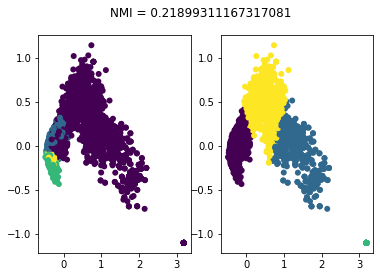

In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_word2vec)
pred_labels_word2vec = KMeans(k4, random_state=42).fit(X_reduced).labels_

eval_clustering_2D(X_reduced, labels_num, pred_labels_word2vec)

In [ ]:
 print(f"Accuracy score :{accuracy(labels_num, pred_labels_word2vec,)} ")

Accuracy score :0.22508809020436926 


ii. Glove

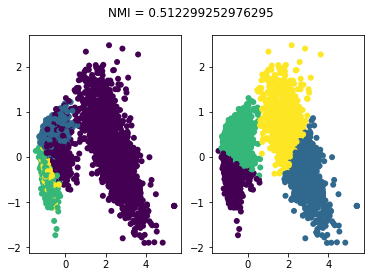

In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_glove)
pred_labels = KMeans(k4, random_state=42).fit(X_reduced).labels_

eval_clustering_2D(X_reduced, labels_num, pred_labels)

In [ ]:
#print(f"Accuracy score :{accuracy(labels_num, pred_labels)} ")

Accuracy score :0.02565186751233263 


**Remarque**: nous remarquons que la NMI de la de a deuxième représentation est plus grande. Donc l'ACP avec le modèle glove combinés donne une meilleure qualité de classification avec l'algorithme k-means.

B. Dataset BBC

i.word2vec

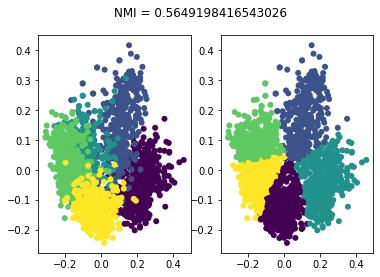

In [ ]:
X_reduced_b = PCA(n_components=2, random_state=42).fit_transform(X_word2vecb)
pred_labels_word2vec_b = KMeans(kb, random_state=42).fit(X_reduced_b).labels_

eval_clustering_2D(X_reduced_b, labels_numb, pred_labels_word2vec_b)

ii. Glove

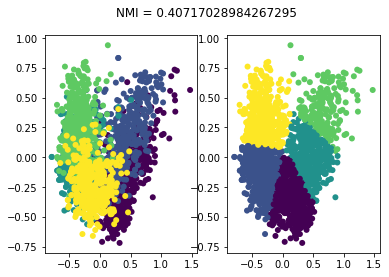

In [ ]:
X_reduced_b = PCA(n_components=2, random_state=42).fit_transform(x_glove_b)
pred_labels_b = KMeans(kb, random_state=42).fit(X_reduced_b).labels_

eval_clustering_2D(X_reduced_b, labels_numb, pred_labels_b)

**Remarque** : Avec le dataset bbc, l'application d'une ACP avec une représenation word2vec donne une meilleure qualité de classification contrairement au premier cas. la volumétrie des datasets et le nombe de classe peut jouer donc un rôle sur l'efficacité d'une représentations des mots. 

###1.2 TSNE

In [ ]:
from sklearn.manifold import TSNE
import plotly
import plotly.graph_objs as go


A. Dataset classic4

i. W2V

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



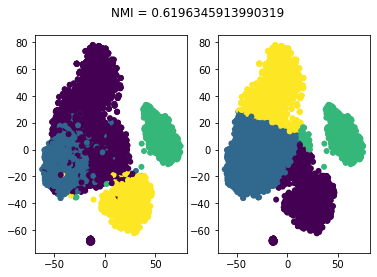

In [ ]:
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_word2vec)
pred_labels_word2vec = KMeans(k4, random_state=42).fit(X_reduced).labels_

eval_clustering_2D(X_reduced, labels_num, pred_labels_word2vec)

In [ ]:
 print(round(accuracy(labels_num, pred_labels_word2vec), 3))

0.401


ii. Glove

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



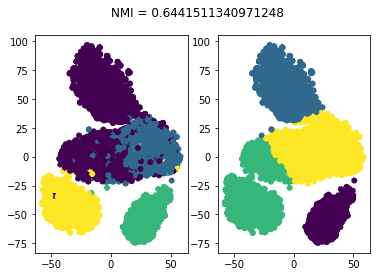

In [ ]:
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_glove)
pred_labels = KMeans(k4, random_state=42).fit(X_reduced).labels_

eval_clustering_2D(X_reduced, labels_num, pred_labels)

In [ ]:
 print(round(normalized_mutual_info_score(labels_num, pred_labels), 3))

0.644


Pour le fichier classic4 la méthode de TSNE améliore la classification en utilisant la representaion glove avec une accurance et clustering meilleur 

B. Dataset BBC

i. Word2vec

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



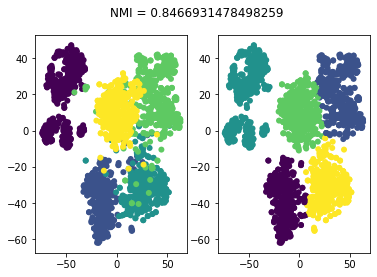

In [ ]:
X_reduced_b= TSNE(n_components=2, random_state=42).fit_transform(X_word2vecb)
pred_labels_word2vec_b = KMeans(kb, random_state=42).fit(X_reduced_b).labels_

eval_clustering_2D(X_reduced_b, labels_numb, pred_labels_word2vec_b)

ii. Glove

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



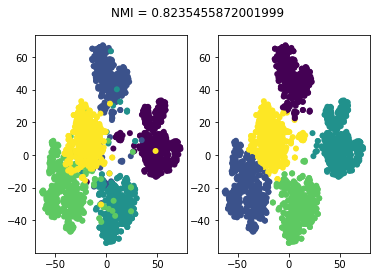

In [ ]:
X_reduced_b = TSNE(n_components=2, random_state=42).fit_transform(x_glove_b)
pred_labels_b = KMeans(kb, random_state=42).fit(X_reduced_b).labels_

eval_clustering_2D(X_reduced_b, labels_numb, pred_labels_b)

**Remarque** 
>Comme nous l'avons constater dans le précédent cas, la représentation word2vec n'est pas adéquate pour les fichiers non-volumineux malgré les performances des deux qui sont proches.

> La méthode de SNE developpe beaucoup les performances par raport à la méthode ACP pour la réduction de dimesion.

###1.3 UMAP

In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 27.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=4f9b24fd8be01c9c9db1b068c6dc548248f5eef5661552a0da7571a2bbcf3f00
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=d654c0db9b9bb0386c56cd846bc3538b7ca79edde6a7c38bbc7bf7491476cfe3
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
from umap import UMAP

A. Dataset classic4

i. Word2vec

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



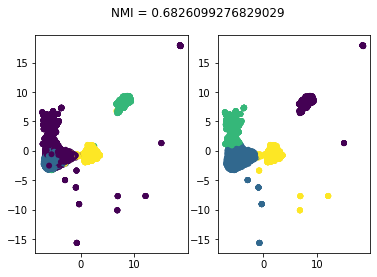

In [ ]:
X_reduced = UMAP(n_components=2, random_state=42).fit_transform(X_word2vec)
pred_labels_word2vec = KMeans(k4, random_state=42).fit(X_reduced).labels_

eval_clustering_2D(X_reduced, labels_num, pred_labels_word2vec)

In [ ]:
 print(round(accuracy(labels_num, pred_labels_word2vec), 3))

0.409


ii. Glove

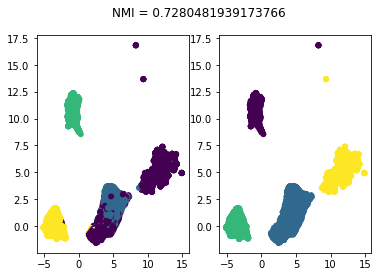

In [ ]:
X_reduced = UMAP(n_components=2, random_state=42).fit_transform(X_glove)
pred_labels = KMeans(k4, random_state=42).fit(X_reduced).labels_

eval_clustering_2D(X_reduced, labels_num, pred_labels)

In [ ]:
 print(round(accuracy(labels_num, pred_labels), 3))

0.206


B. Dataset BBC

i. Word2Vec

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



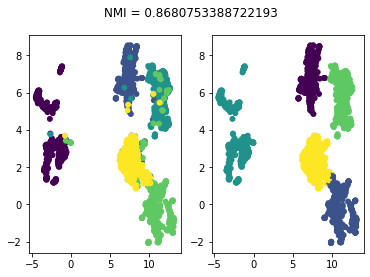

In [ ]:
X_reduced_b = UMAP(n_components=2, random_state=42).fit_transform(X_word2vecb)
pred_labels_word2vec_b = KMeans(kb, random_state=42).fit(X_reduced_b).labels_

eval_clustering_2D(X_reduced_b, labels_numb, pred_labels_word2vec_b)

ii. Glove

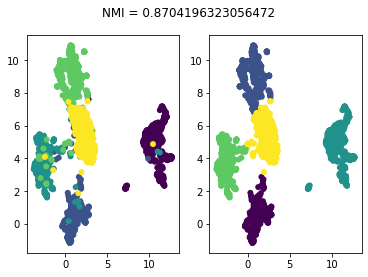

In [ ]:
X_reduced_b = UMAP(n_components=2, random_state=42).fit_transform(x_glove_b)
pred_labels_glove_b = KMeans(kb, random_state=42).fit(X_reduced_b).labels_

eval_clustering_2D(X_reduced_b, labels_numb, pred_labels_glove_b)

**Remarque** :
> Nous constatons qu'avec la réduction UMAP, nous avons obtenu une meilleure NMI en plus elle est indépenadante du type de représentation (les NMIs sont presque toutes équivalentes pour les deux datasets avec les deux représentations).

> En outre, la réduction par UMAP permet d'avoir une bonne qualité de  classification avec kmeans (meilleure que TSNE et ACP) pour les deux datasets.


###1.4 Autoencodeurs

In [ ]:
from torch.utils.data import DataLoader
import numpy as np
import torch

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
class AutoEncoder(torch.nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super().__init__()
        self.input_dim = input_dim
        self.embedding_dim = embedding_dim
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(self.input_dim, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, self.embedding_dim)
        )
        
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(self.embedding_dim, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, self.input_dim),
            torch.nn.Sigmoid()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
def autoencoder(X, embedding_dim, n_epochs=50, batch_size=64, learning_rate=1e-3, weight_decay=1e-8, seed=None, return_model=False):
    if torch.cuda.is_available():
        device = 'cuda'
    else:
        device = 'cpu'
    if seed is not None:
      torch.manual_seed(seed)
    dataloader = DataLoader(dataset=X, batch_size=batch_size, shuffle=True)
    model = AutoEncoder(input_dim=X.shape[1], embedding_dim=embedding_dim)

    if device == 'cuda':
      model.cuda()

    loss_function = torch.nn.MSELoss()

    optimizer = torch.optim.Adam(model.parameters(),
                                lr=learning_rate,
                                weight_decay=weight_decay)

    losses = []

    model.train()
    for epoch in tqdm(range(n_epochs)):
        for batch in dataloader:
          batch = batch.to(device)
          reconstructed = model(batch)
          
          loss = loss_function(reconstructed, batch)
          
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          
          losses.append(loss)

    model.eval()
    tensor_X = torch.tensor(X)
    tensor_X = tensor_X.to(device)
    encoded_X = model.encoder(tensor_X)
    encoded_X = encoded_X.detach().cpu().numpy()

    if return_model:
      return encoded_X, model, losses
    else:
      return encoded_X

A. Dataset Classic4

i. Word2Vec

100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


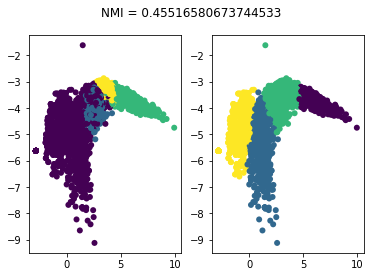

In [ ]:
X_reduced= autoencoder(X_word2vec.astype('float32'), 2, seed=42)
pred_labels = KMeans(k4, random_state=42).fit(X_reduced).labels_

eval_clustering_2D(X_reduced, labels_num, pred_labels)

In [ ]:
 print(round(normalized_mutual_info_score( labels_num, pred_labels), 3))

0.455


ii. Glove

100%|██████████| 50/50 [00:11<00:00,  4.34it/s]


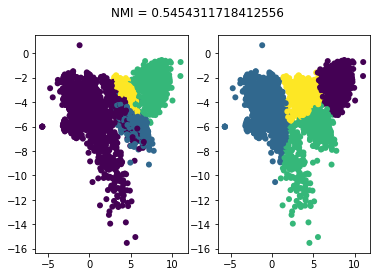

In [ ]:
X_reduced= autoencoder(X_glove.astype('float32'), 2, seed=42)
pred_labels = KMeans(k4, random_state=42).fit(X_reduced).labels_

eval_clustering_2D(X_reduced, labels_num, pred_labels)

In [ ]:
 print(round(normalized_mutual_info_score(labels_num, pred_labels), 3))

0.545


B. Dataset BBC

i. Word2vec

100%|██████████| 50/50 [00:04<00:00, 10.82it/s]


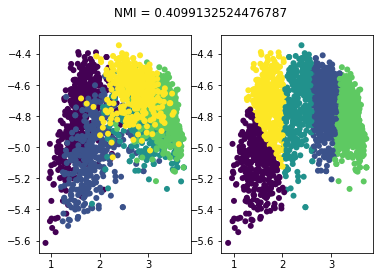

In [ ]:
X_reduced_b= autoencoder(X_word2vecb.astype('float32'), 2, seed=42)
pred_labels_b = KMeans(kb, random_state=42).fit(X_reduced_b).labels_

eval_clustering_2D(X_reduced_b, labels_numb, pred_labels_b)

ii. Glove

100%|██████████| 50/50 [00:04<00:00, 11.40it/s]


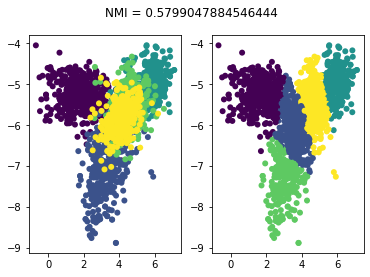

In [ ]:
X_reduced_b= autoencoder(x_glove_b.astype('float32'), 2, seed=42)
pred_labels_b = KMeans(kb, random_state=42).fit(X_reduced_b).labels_

eval_clustering_2D(X_reduced_b, labels_numb, pred_labels_b)

**Remarque** :

>les auto-Encodeur n'ont pas amélioré les performances en utilisant k-means. En effet, la qualité de classification obtenue par ces auto-encoder est éuivalente à la qualité de classification obtenue par l'ACP. 

> L'un des facteurs qui affecte les performances des auto-encoders est le nombre de layers que nous avons utilisé pour la réduction de dimention.

### 1.5 Interprétation : 
---
> la première remarque concerne la méthode de k-means qui donne toujours des formes spheriques est cela revient au principe de la méthode de trouver un centre qui représente la classe puis attacher les points les plus proche à ce centre, cela retourne une classe de forme sphere autour du centre de la classe.


> Pour la représentation des données toujours la rprésentaion  Glove qui donne des meilleurs resultats apres la classification des données car cette présentation prend en consideration l'aspect sémantique des mots dans le vocabulaire en basant sur la co-occurances des mots ensemble.


> pour les deux fichiers classic4 et bbc, on remarque que les méthodes de redimensionnement T-SNE et UMAP sont les meilleurs dans la classification k-means et nous remaquons une meilleure séparation des classes dans l'espace pour les deux représentations des fichiers.


> Le tableau suivant résume les NMIs obtenus pour les deux datasets pour chauque type de représentation.






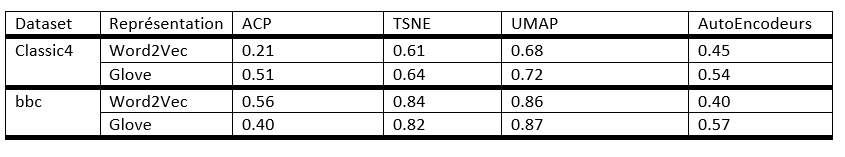

## 2. CAH :

---

La méthode de classification hierarchique ascendante en commencant avec n classes (documents) pour arrivé a une seule classe qui regroupe tous les documents

In [ ]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score

###2.1 ACP

A. Dataset Classic4

i. W2V

In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_word2vec)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = k4).fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_num, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_num, label_pred )}")
print(f"Accuracy score :{accuracy(labels_num, label_pred)} ")

NMI : 0.21568437017576683
ARI : -0.05260331664988588
Accuracy score :0.32346723044397463 


In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_word2vec)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = k4, affinity='cosine', linkage='complete').fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_num, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_num, label_pred )}")
print(f"Accuracy score :{accuracy(labels_num, label_pred)} ")

NMI : 0.3976110162563995
ARI : 0.18759464811816579
Accuracy score :0.43706835799859056 


ii. Glove

In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_glove)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = k4).fit(X_reduced)
label_pred = clustering.labels_

print(f"NMI : {normalized_mutual_info_score(labels_num, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_num, label_pred )}")
print(f"Accuracy score :{accuracy(labels_num, label_pred)} ")

NMI : 0.562862925392473
ARI : 0.34448367380360045
Accuracy score :0.5171247357293869 


In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_glove)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = k4, affinity='cosine', linkage='complete').fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_num, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_num, label_pred )}")
print(f"Accuracy score :{accuracy(labels_num, label_pred)} ")

NMI : 0.285457453781902
ARI : 0.11802069623834881
Accuracy score :0.09119097956307258 


B. DataSet BBC

i. Word2Vec

In [ ]:
X_reduced_b = PCA(n_components=2, random_state=42).fit_transform(X_word2vecb)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = kb).fit(X_reduced_b)
label_pred_b = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb, label_pred_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb, label_pred_b )}")
print(f"Accuracy score :{accuracy(labels_numb, label_pred_b)} ")

NMI : 0.5540626797763771
ARI : 0.48918710967674744
Accuracy score :0.4966292134831461 


In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_word2vecb)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = kb, affinity='cosine', linkage='complete').fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_numb, label_pred )}")
print(f"Accuracy score :{accuracy(labels_numb, label_pred)} ")

NMI : 0.5679838431351041
ARI : 0.5470118423103817
Accuracy score :0.24629213483146067 


ii. Glove

In [ ]:
X_reduced_b = PCA(n_components=2, random_state=42).fit_transform(x_glove_b)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = kb).fit(X_reduced_b)
label_pred_b = clustering.labels_

print(f"NMI : {normalized_mutual_info_score(labels_numb, label_pred_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb, label_pred_b )}")
print(f"Accuracy score :{accuracy(labels_numb, label_pred_b)} ")

NMI : 0.41582388191895214
ARI : 0.3374729300638975
Accuracy score :0.023370786516853932 


In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(x_glove_b)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = kb, affinity='cosine', linkage='complete').fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_numb, label_pred )}")
print(f"Accuracy score :{accuracy(labels_numb, label_pred)} ")

NMI : 0.42505676136432663
ARI : 0.3608077744157503
Accuracy score :0.23370786516853934 


**Remarque** :

---


Nous remarquons que le changement de la metrique euclidienne a cosine a developper les qualités de classification CAH pour le word2vec (surtout avec le linkage 'complete') car il représente déjà des vecteurs des mots et cela est plus remarquable dans le fichier volumineux classic4  que bbc. En effet, avec bbc, nous remarquons un petit changement dans les mesures de la classification. Ensuite, pour la représentation glove la méthode par defaut 'euclidean' est meilleure car cette représentation depend d'une distence de co-occurence des mots donc le changement vers la metric cosine ne change pas grand chose.  

### 2.2 TSNE

A. Dataset Classic4

i. W2V

In [ ]:
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_word2vec)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = k4).fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_num, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_num, label_pred )}")
print(f"Accuracy score :{accuracy(labels_num, label_pred)} ")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



NMI : 0.6284546409798537
ARI : 0.48058926115573625
Accuracy score :0.13911205073995772 


ii. Glove

In [ ]:
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_glove)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = k4).fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_num, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_num, label_pred )}")
print(f"Accuracy score :{accuracy(labels_num, label_pred)} ")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



NMI : 0.7361083279979366
ARI : 0.5263135460250146
Accuracy score :0.4201550387596899 


B. Dataset BBC

i. Word2Vec

In [ ]:
X_reduced_b = TSNE(n_components=2, random_state=42).fit_transform(X_word2vecb)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = kb).fit(X_reduced_b)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb, label_pred_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb, label_pred_b )}")
print(f"Accuracy score :{accuracy(labels_numb, label_pred_b)} ")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



NMI : 0.8276524164814193
ARI : 0.8531110967398828
Accuracy score :0.19280898876404495 


ii. Glove

In [ ]:
X_reduced_b = TSNE(n_components=2, random_state=42).fit_transform(x_glove_b)
#générer la matrice des liens
clustering = AgglomerativeClustering(n_clusters = kb).fit(X_reduced_b)
label_pred_b = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb, label_pred_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb, label_pred_b )}")
print(f"Accuracy score :{accuracy(labels_numb, label_pred_b)} ")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



NMI : 0.8276524164814193
ARI : 0.8531110967398828
Accuracy score :0.19280898876404495 


### 2.3 UMAP

A. Dataset Classic4

i. W2V

In [ ]:
X_reduced = UMAP(n_components=2, random_state=42).fit_transform(X_word2vec)
clustering = AgglomerativeClustering(n_clusters = 4).fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_num, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_num, label_pred )}")
print(f"Accuracy score :{accuracy(labels_num, label_pred)} ")

NMI : 0.6827460256939641
ARI : 0.4935158267346829
Accuracy score :0.2142353770260747 


ii. Glove

In [ ]:
X_reduced = UMAP(n_components=2, random_state=42).fit_transform(X_glove)
clustering = AgglomerativeClustering(n_clusters = 4).fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_num, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_num, label_pred )}")
print(f"Accuracy score :{accuracy(labels_num, label_pred)} ")

NMI : 0.7321722782133895
ARI : 0.5257427069467999
Accuracy score :0.5615221987315011 


B. Dataset BBC

i. Word2Vec

In [ ]:
X_reduced_b = UMAP(n_components=2, random_state=42).fit_transform(X_word2vecb)
clustering = AgglomerativeClustering(n_clusters = 4).fit(X_reduced_b)
label_pred_b = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb, label_pred_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb, label_pred_b )}")
print(f"Accuracy score :{accuracy(labels_numb, label_pred_b)} ")

NMI : 0.774143327465136
ARI : 0.7183735185373945
Accuracy score :0.01303370786516854 


ii. Glove

In [ ]:
X_reduced_b = UMAP(n_components=2, random_state=42).fit_transform(x_glove_b)
clustering = AgglomerativeClustering(n_clusters = 4).fit(X_reduced_b)
label_pred_b = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb, label_pred_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb, label_pred_b )}")
print(f"Accuracy score :{accuracy(labels_numb, label_pred_b)} ")

NMI : 0.8041202044668448
ARI : 0.7120129847367749
Accuracy score :0.01348314606741573 


### 2.4 Autoencder

A. Dataset Classic4

i. W2V

In [ ]:
X_reduced= autoencoder(X_word2vec.astype('float32'), 2, seed=42 ,n_epochs = 50)
clustering = AgglomerativeClustering(n_clusters = 4).fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_num, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_num, label_pred )}")
print(f"Accuracy score :{accuracy(labels_num, label_pred)} ")

100%|██████████| 50/50 [00:12<00:00,  3.89it/s]


NMI : 0.45618408967419033
ARI : 0.16954940554506648
Accuracy score :0.3629316420014094 


ii. Glove

In [ ]:
X_reduced= autoencoder(X_glove.astype('float32'), 2, seed=42, n_epochs = 50)
clustering = AgglomerativeClustering(n_clusters = 4).fit(X_reduced)
label_pred = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_num, label_pred )}")
print(f"ARI : {adjusted_rand_score(labels_num, label_pred )}")
print(f"Accuracy score :{accuracy(labels_num, label_pred)} ")

100%|██████████| 50/50 [00:12<00:00,  3.94it/s]


NMI : 0.6001533880469695
ARI : 0.41642341834215324
Accuracy score :0.5219168428470754 


B. Dataset BBC

i. Word2Vec

In [ ]:
X_reduced_b= autoencoder(X_word2vecb.astype('float32'), 2, seed=42)
clustering = AgglomerativeClustering(n_clusters = 4).fit(X_reduced_b)
label_pred_b = clustering.labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb, label_pred_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb, label_pred_b )}")
print(f"Accuracy score :{accuracy(labels_numb, label_pred_b)} ")

100%|██████████| 50/50 [00:04<00:00, 11.95it/s]


NMI : 0.4172686768076951
ARI : 0.3332779652379
Accuracy score :0.2593258426966292 


ii. Glove

In [ ]:
X_reduced_b= autoencoder(x_glove_b.astype('float32'), 2, seed=42)
clustering = AgglomerativeClustering(n_clusters = 4).fit(X_reduced_b)
label_pred_b = clustering.labels_
print("")
print(f"NMI : {normalized_mutual_info_score(labels_numb, label_pred_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb, label_pred_b )}")
print(f"Accuracy score :{accuracy(labels_numb, label_pred_b)} ")

100%|██████████| 50/50 [00:04<00:00, 11.86it/s]



NMI : 0.5446670350051113
ARI : 0.47652943961046523
Accuracy score :0.2512359550561798 


### 2.5 Interpértation : 

---



> Pour la méthode de classification hiérarchique ascendante, la réduction de dimension en utilisant UMAP ou TSNE retourne des resultats meilleurs que l'ACP ou l'auto-encodeur notamment avec la représentation glove.


> La classification hiérarchique retourne des classifications meilleures que K-means au niveau de la qualité de représentation et la précision des classes.


> Nous avons essayé de changer la metrique vers l'une des autres (manhattan, cosine, l1 ou l2) avec les différents types de linkage mais cela n'a fait que déteriorer la qualité de clustering car Le T-SNE est une forme de réduction stochastique avec des probabilités dont la métrique euclidiean est la plus adéquate.

> Nous avons aussi essayé de changer le nombre  d'epoques pour l'auto-encoder,  mais cela n'améliore pas les performance de CAH.

> Le tableau suivant résume les résultats obtenus pour les deux datasets pour chauque type de représentation 







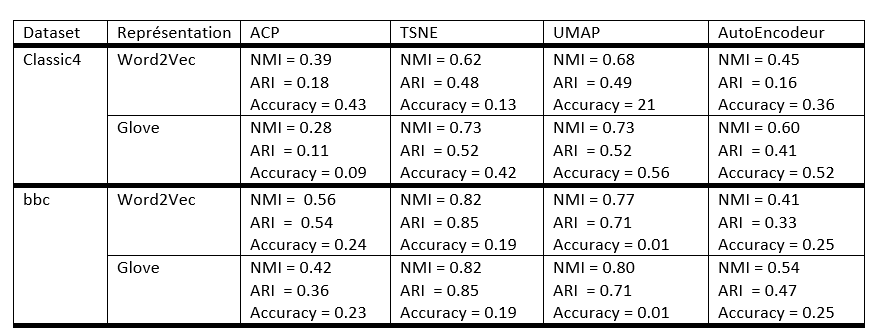

## 3. HDBSCAN

---

Classification hierarchique basé sur la densité spatiale

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 9.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311891 sha256=013d493f544e85bf08c09b957509cff0df326c616f17dc3b7717e2db24e4b214
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
import hdbscan

### 3.1 ACP

A. Dataset Classic4

i. w2v

NMI : 0.17576147139022838
ARI : -0.07853499758449128
Accuracy score :0.009725158562367865 


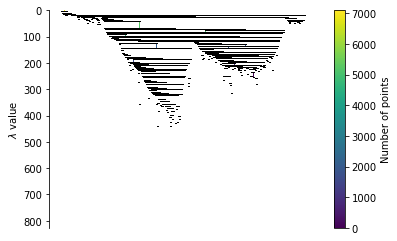

In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_word2vec)
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

NMI : 0.13308075388642363
ARI : -0.03198535490561043
Accuracy score :0.29288231148696264 


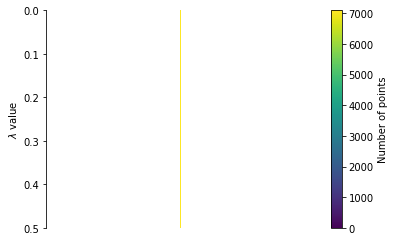

In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_word2vec)
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "correlation").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

NMI : 0.17576147139022838
ARI : -0.07853499758449128
Accuracy score :0.009725158562367865 


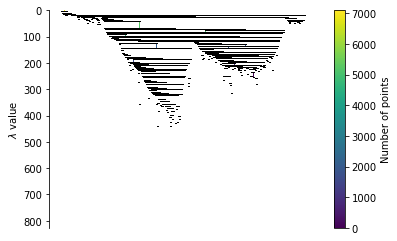

In [ ]:
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

NMI : 0.21315016180925314
ARI : -0.011183119200678411
Accuracy score :0.009725158562367865 


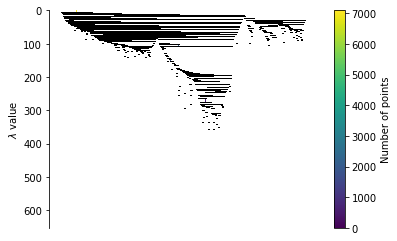

In [ ]:
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "braycurtis").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

NMI : 0.3813750950934331
ARI : 0.23849919124858615
Accuracy score :0.0015503875968992248 


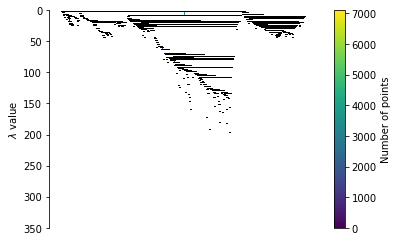

In [ ]:
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "canberra").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

NMI : 0.20563584325675097
ARI : -0.020343612578417672
Accuracy score :0.009725158562367865 


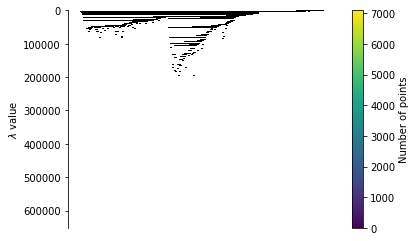

In [ ]:
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "sqeuclidean").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

ii. glove

NMI : 0.17576147139022838
ARI : -0.07853499758449128
Accuracy score :0.009725158562367865 


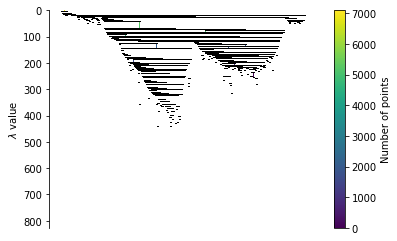

In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_word2vec)
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

B. Dataset BBC

i.Word2vec

NMI : 0.25445629388779006
ARI : 0.012939490531106315
Accuracy score :0.0 


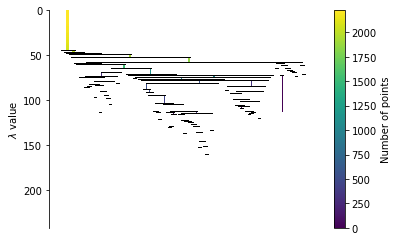

In [ ]:
X_reduced_b = PCA(n_components=2, random_state=42).fit_transform(X_word2vecb)
hdb_model_b= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced_b)
pred_labels_b = hdb_model_b.labels_
hdb_model_b.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_numb, pred_labels_b)}")
print(f"ARI : {adjusted_rand_score(labels_numb, pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb, pred_labels_b)} ")

ii.Glove

NMI : 0.014462737643115528
ARI : 0.0003360926207998415
Accuracy score :0.16134831460674157 


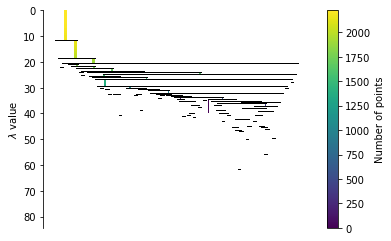

In [ ]:
X_reduced_b = PCA(n_components=2, random_state=42).fit_transform(x_glove_b)
hdb_model_b= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced_b)
pred_labels_b = hdb_model_b.labels_
hdb_model_b.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_numb, pred_labels_b)}")
print(f"ARI : {adjusted_rand_score(labels_numb, pred_labels_b)}")
print(f"Accuracy score :{accuracy(labels_numb, pred_labels_b)} ")

NMI : 0.24391535638302847
ARI : 0.013739095149039907
Accuracy score :0.0008988764044943821 


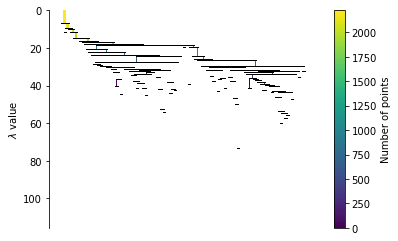

In [ ]:
hdb_model_b= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "braycurtis").fit(X_reduced_b)
pred_labels_b = hdb_model_b.labels_
hdb_model_b.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_numb, pred_labels_b)}")
print(f"ARI : {adjusted_rand_score(labels_numb, pred_labels_b)}")
print(f"Accuracy score :{accuracy(labels_numb, pred_labels_b)} ")

### 3.2 TSNE

A. Dataset Classic 4

i. W2V

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



NMI : 0.3480895788115813
ARI : 0.14973869552814953
Accuracy score :0.0012684989429175475 


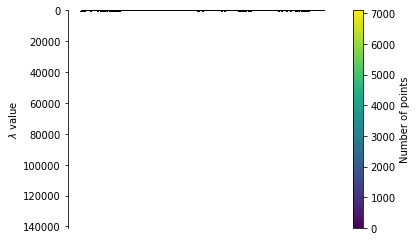

In [ ]:
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_word2vec)
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "braycurtis").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")    

ii. GLove

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



NMI : 0.35948206184538145
ARI : 0.16964508716077684
Accuracy score :0.0008456659619450317 


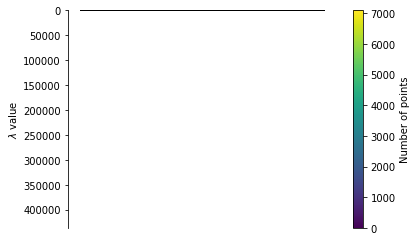

In [ ]:
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_glove)
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

B. Dataset BBC

i. Word2vec

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



NMI : 0.43385793434629344
ARI : 0.15439344795776458
Accuracy score :0.0 


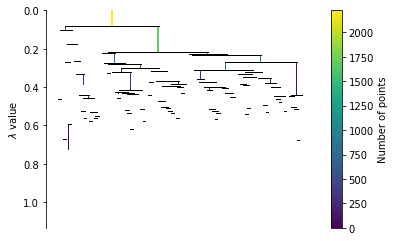

In [ ]:
X_reduced_b = TSNE(n_components=2, random_state=42).fit_transform(X_word2vecb)
hdb_model_b= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced_b)
pred_labels_b = hdb_model_b.labels_
hdb_model_b.condensed_tree_.plot()

print(f"NMI : {normalized_mutual_info_score(labels_numb, pred_labels_b)}")
print(f"ARI : {adjusted_rand_score(labels_numb, pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb, pred_labels_b)} ") 

ii. Glove

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



NMI : 0.5852689386068516
ARI : 0.47625938891451247
Accuracy score :0.21887640449438203 


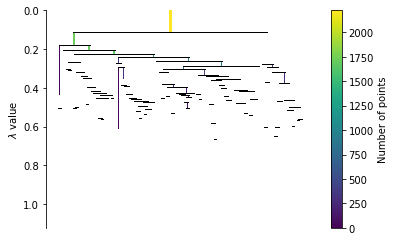

In [ ]:
X_reduced_b = TSNE(n_components=2, random_state=42).fit_transform(x_glove_b)
hdb_model_b= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced_b)
pred_labels_b = hdb_model_b.labels_
hdb_model_b.condensed_tree_.plot()

print(f"NMI : {normalized_mutual_info_score(labels_numb, pred_labels_b)}")
print(f"ARI : {adjusted_rand_score(labels_numb, pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb, pred_labels_b)} ") 

### 3.3 UMAP

A. Dataset Classic4

i. W2V

NMI : 0.5052035532441763
ARI : 0.34282830338844517
Accuracy score :0.14460887949260043 


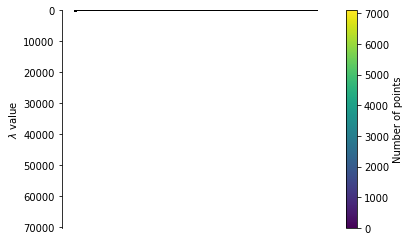

In [ ]:
X_reduced = UMAP(n_components=2, random_state=42).fit_transform(X_word2vec)
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

ii. GLove

NMI : 0.5699554001586455
ARI : 0.39233356943110353
Accuracy score :0.004651162790697674 


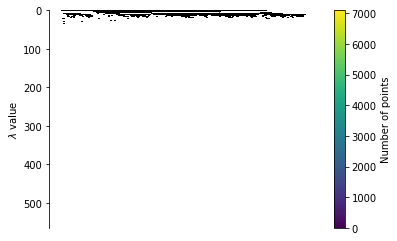

In [ ]:
X_reduced = UMAP(n_components=2, random_state=42).fit_transform(X_glove)

hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

B. Dataset BBC

i. Word2Vec

NMI : 0.42994362478668574
ARI : 0.08382101136957111
Accuracy score :0.006741573033707865 


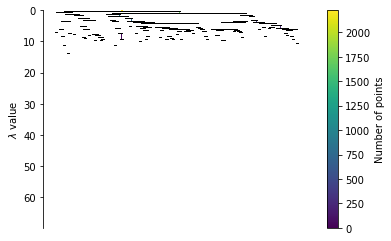

In [ ]:
X_reduced_b = UMAP(n_components=2, random_state=42).fit_transform(X_word2vecb)
hdb_model_b= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced_b)
pred_labels_b = hdb_model_b.labels_
hdb_model_b.condensed_tree_.plot()

print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b)}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b)} ")

ii. Glove

NMI : 0.41474904804440865
ARI : 0.05806029522778045
Accuracy score :0.012134831460674157 


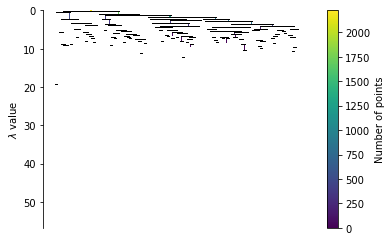

In [ ]:
X_reduced_b = UMAP(n_components=2, random_state=42).fit_transform(x_glove_b)
hdb_model_b= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced_b)
pred_labels_b = hdb_model_b.labels_
hdb_model_b.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b)}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b)} ")

### 3.4 AutoEncoder

A. Dataset classic4

i. W2V

100%|██████████| 50/50 [00:13<00:00,  3.81it/s]


NMI : 0.33645704493656675
ARI : 0.20989236865801156
Accuracy score :0.009725158562367865 


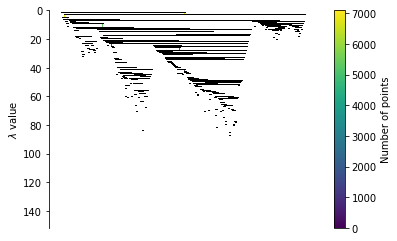

In [ ]:
X_reduced= autoencoder(X_word2vec.astype('float32'), 2, seed=42)
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

ii. Glove

100%|██████████| 50/50 [00:12<00:00,  3.90it/s]


NMI : 0.33645704493656675
ARI : 0.20989236865801156
Accuracy score :0.009725158562367865 


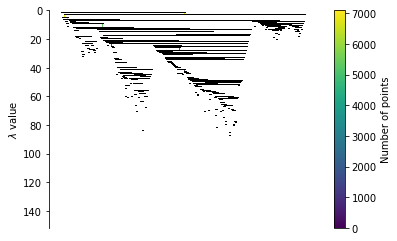

In [ ]:
X_reduced= autoencoder(X_word2vec.astype('float32'), 2, seed=42)
hdb_model= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced)
pred_labels = hdb_model.labels_
hdb_model.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

B. Dataset BBC

i. Word2Vec

100%|██████████| 50/50 [00:04<00:00, 11.98it/s]


NMI : 0.24664647525682748
ARI : 0.07194584249247105
Accuracy score :0.0008988764044943821 


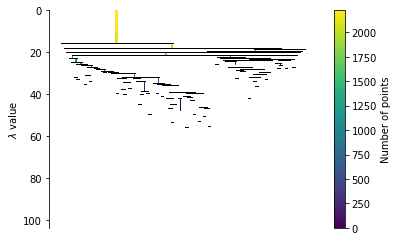

In [ ]:
X_reduced_b= autoencoder(X_word2vecb.astype('float32'), 2, seed=42)
hdb_model_b= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced_b)
pred_labels_b = hdb_model_b.labels_
hdb_model_b.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b )} ")

ii. Glove

100%|██████████| 50/50 [00:04<00:00, 12.07it/s]


NMI : 0.30668748567525433
ARI : 0.15968011207702057
Accuracy score :0.0 


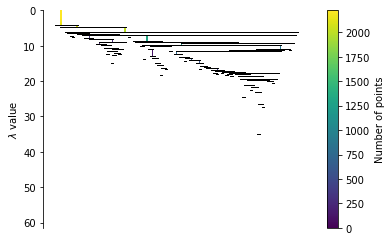

In [ ]:
X_reduced_b= autoencoder(x_glove_b.astype('float32'), 2, seed=42)
hdb_model_b= hdbscan.HDBSCAN(algorithm = 'best', alpha = 1.0, leaf_size=40, cluster_selection_method='eom', metric = "euclidean").fit(X_reduced_b)
pred_labels_b = hdb_model_b.labels_
hdb_model_b.condensed_tree_.plot()
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b )} ")

### 3.5 Interprétation : 

---
>Pour ce type de classsification non-supervisé HDBSCAN, la réduction par TSNE et UMAP donne toujours des meilleurs classifications surtout avec la representation glove


> Nous avons essayé d'autres types de distances pour le hdbscan. La distance "correlation" a donné de meilleurs résultats  


> La valeur de l'accuracy est faible vu le nombre de classes choisi par la fonction hdbscan elle même.

> Le tableau suivant résume les résultats obtenus pour les deux datasets pour chauque type de représentation 








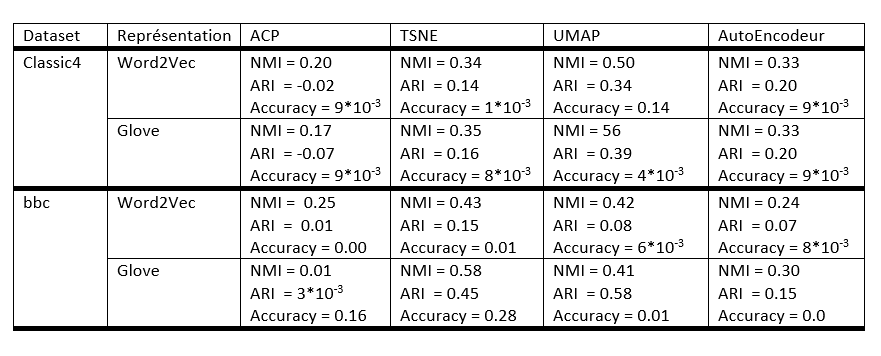

## 4. Clustering spectrale

In [ ]:
from sklearn.cluster import SpectralClustering

### 4.1 ACP

A. Dataset classic4

i. W2V

In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_word2vec)
pred_labels=SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced).labels_
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")


NMI : 0.21095674270453985
ARI : -0.0418560972561154
Accuracy score :0.23735024665257223 


ii. Glove

In [ ]:
X_reduced = PCA(n_components=2, random_state=42).fit_transform(X_glove)
pred_labels = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced).labels_
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

NMI : 0.2156084044502942
ARI : -0.06424085170142686
Accuracy score :0.22396053558844256 


B. Dataset BBC

i. Word2Vec

In [ ]:
X_reduced_b = PCA(n_components=2, random_state=42).fit_transform(X_word2vecb)
pred_labels_b=SpectralClustering(n_clusters=kb, assign_labels='discretize', random_state=42).fit(X_reduced_b).labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b )} ")

NMI : 0.5537336447320488
ARI : 0.5150266865996215
Accuracy score :0.26157303370786517 


ii. Glove

In [ ]:
X_reduced_b = PCA(n_components=2, random_state=42).fit_transform(x_glove_b)
pred_labels_b=SpectralClustering(n_clusters=kb, assign_labels='discretize', random_state=42).fit(X_reduced_b).labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b )} ")

NMI : 0.3958538251519977
ARI : 0.32312026613630007
Accuracy score :0.07865168539325842 


### 4.2 TSNE

A. dataset Classic4

i. W2V

In [ ]:
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_word2vec)
pred_labels = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced).labels_
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



ii. Glove

In [ ]:
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_glove)
pred_labels = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced).labels_
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

B. dataset BBC

i. Word2Vec

In [ ]:
X_reduced_b = TSNE(n_components=2, random_state=42).fit_transform(X_word2vecb)
pred_labels_b = SpectralClustering(n_clusters=kb, assign_labels='discretize', random_state=42).fit(X_reduced_b).labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b )} ")

ii. Glove

In [ ]:
X_reduced_b = TSNE(n_components=2, random_state=42).fit_transform(x_glove_b)
pred_labels_b = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced_b).labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b )} ")

### 4.3 UMAP

A. Dataset classic4

i. W2V

In [ ]:
X_reduced = UMAP(n_components=2, random_state=42).fit_transform(X_word2vec)
pred_labels = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced).labels_
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

ii. Glove

In [ ]:
X_reduced = UMAP(n_components=2, random_state=42).fit_transform(X_glove)
pred_labels = SpectralClustering(n_clusters=k4 , assign_labels='discretize', random_state=42).fit(X_reduced).labels_
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

B. Dataset BBC

i. Word2Vec

In [ ]:
X_reduced_b = UMAP(n_components=2, random_state=42).fit_transform(X_word2vecb)
pred_labels_b = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced_b).labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b )} ")

ii. Glove

In [ ]:
X_reduced_b = UMAP(n_components=2, random_state=42).fit_transform(x_glove_b)
pred_labels_b = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced_b).labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b )} ")

### 4.4 AutoEncoder

A. Dataset classic4

i. W2V

In [ ]:
X_reduced= autoencoder(X_word2vec.astype('float32'), 2, seed=42)
pred_labels = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced).labels_
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

100%|██████████| 50/50 [00:11<00:00,  4.36it/s]


KeyboardInterrupt: ignored

ii. Glove

In [ ]:
X_reduced= autoencoder(X_glove.astype('float32'), 2, seed=42)
pred_labels = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced).labels_
print(f"NMI : {normalized_mutual_info_score(labels_num,pred_labels )}")
print(f"ARI : {adjusted_rand_score(labels_num,pred_labels )}")
print(f"Accuracy score :{accuracy(labels_num,pred_labels )} ")

B. Dataset BBC

i. Word2Vec

In [ ]:
X_reduced_b= autoencoder(X_word2vecb.astype('float32'), 2, seed=42)
pred_labels_b = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced_b).labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b )} ")

ii. Glove

In [ ]:
X_reduced_b= autoencoder(x_glove_b.astype('float32'), 2, seed=42)
pred_labels_b = SpectralClustering(n_clusters=k4, assign_labels='discretize', random_state=42).fit(X_reduced_b).labels_
print(f"NMI : {normalized_mutual_info_score(labels_numb,pred_labels_b )}")
print(f"ARI : {adjusted_rand_score(labels_numb,pred_labels_b )}")
print(f"Accuracy score :{accuracy(labels_numb,pred_labels_b )} ")



```
# Ce texte est au format code
```

### 4.5 Interprétation : 

---



> Ce type de clustering donne de meilleurs resultats en utilisant l'ACP dont il utilise un graphe de similarité pour trouver des communautés de points dans ce graphe.  



#Partie 2 :  Apprentissage et factorisation matricielle
> La plupart des approches d'apprentissage traitent la réduction de la dimensionnalité (DR) et le clustering séparément (c'est-à-dire séquentiellement), mais des recherches récentes ont montré que l'optimisation conjointe de ces deux tâches peut améliorer considérablement les performances des deux [[yang et al,. 2017](http://proceedings.mlr.press/v70/yang17b/yang17b.pdf) ]

> La partie 2 consiste à appliquer ces algorithmes  sur les deux Datasets classic4 et bbc. 


In [ ]:
# pour la deuxieme partie
!pip install rpy2
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.packages import importr
utils = importr('utils')
utils.install_packages('FCPS', repos="https://cloud.r-project.org")
fcps = importr('FCPS')
utils.install_packages('kohonen')
utils.install_packages('clustrd')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘sp’, ‘pracma’, ‘reshape2’, ‘RcppArmadillo’, ‘mclust’, ‘DataVisualizations’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f6453a966e0> [RTYPES.NILSXP]

## 1. Reduced K-means

>Reduced K-means une méthode permettant de regrouper des objets dans un sous-espace à faible dimension. L'avantage de cette méthode est qu'elle permet d'obtenir simultanément le regroupement des objets et le sous-espace de faible dimension qui reflète la structure du regroupement

>Traditionnellement pour effectuer un clustring k-means, nous réduisant la dimention (ACP est souvent effectuée) ensuite nous appliquant le k-means traditionnel. Le clustering RKM détermine simultanément les clusters d'objets sur la base de la méthode k-means et le sous-espace qui est informatif sur la structure des clusters dans les données sur la base de l'analyse des composants [[Yoshikazu Terada 2014](https://arxiv.org/pdf/1212.4942.pdf)].

A. Dataset classic4

i. Word2Vec

In [ ]:
rkm = fcps.TandemClustering(X_word2vec,k4,Type="Reduced", PlotIt=False,ndim=3, nstart=10)
pred_labelsRKMGloveClassic4 = rkm[0]
X_reduced= rkm[1][0]

R[write to console]: Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



  |======================================================================| 100%

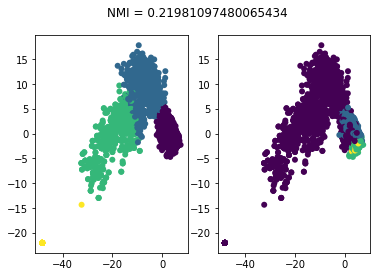

In [ ]:
eval_clustering_2D(X_reduced, pred_labelsRKMGloveClassic4, labels_num)

ii. Glove

In [ ]:
rkm = fcps.TandemClustering(X_glove,k4,Type="Reduced", PlotIt=False,ndim=3, nstart=10)
pred_labelsRKMGloveClassic4 = rkm[0]
X_reduced= rkm[1][0]


  |======================================================================| 100%

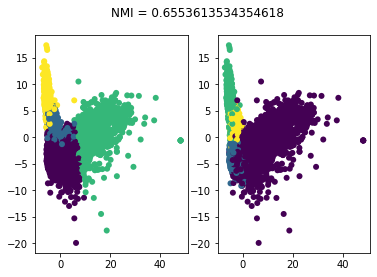

In [ ]:
eval_clustering_2D(X_reduced, pred_labelsRKMGloveClassic4, labels_num)

B. Dataset BBC

i. Word2Vec

In [ ]:
rkm = fcps.TandemClustering(X_word2vecb,kb,Type="Reduced", PlotIt=False,ndim=3, nstart=10)
pred_labelsRKMGloveBBC = rkm[0]
X_reduced_b= rkm[1][0]

  |======================================================================| 100%

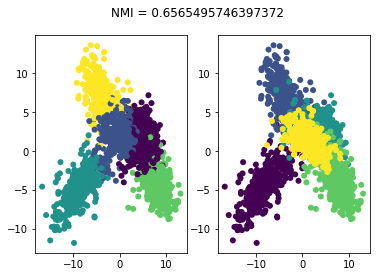

In [ ]:
eval_clustering_2D(X_reduced_b, pred_labelsRKMGloveBBC, labels_numb)

ii. Glove

In [ ]:
rkm = fcps.TandemClustering(x_glove_b,kb,Type="Reduced", PlotIt=False,ndim=3, nstart=10)
pred_labelsRKMGloveBBC = rkm[0]
X_reduced_b= rkm[1][0]

  |======================================================================| 100%

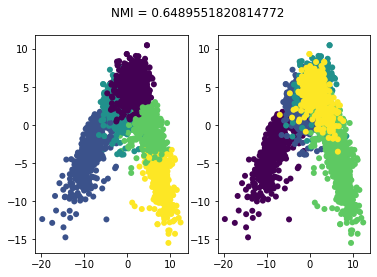

In [ ]:
eval_clustering_2D(X_reduced_b, pred_labelsRKMGloveBBC, labels_numb)

### Remarque 
 
> La NMI obtenue pour la représentation word2vec est proportionnellement inférieure à la NMI obtenue avec Glove pour le dataset classic4. Néanmoins, pour le deuxième dataset la NMI est presque la même pour les deux représentations. 

## 2. Factorial K-means
> Le regroupement par k-means factoriel (FKM) est une méthode de regroupement d'objets dans un sous-espace de faible dimension. L'avantage de cette méthode est que la partition des objets et le sous-espace de basse dimension reflétant la structure du cluster sont obtenus simultanément.

>Dans certains cas, le clustering k-means réduit (RKM) ne fonctionne pas bien, le clustering FKM peut découvrir la structure de cluster sous-jacente à un sous-espace de dimension inférieure [[Yoshikazu Terada-b 2014](https://arxiv.org/pdf/1301.0676.pdf#:~:text=Abstract%3A%20Factorial%20k%2Dmeans%20(,cluster%20structure%20are%20obtained%2C%20simultaneously.)].


A. Dataset classic4

i. Word2Vec

In [ ]:
rkm = fcps.TandemClustering(X_word2vec,k4,Type="Factorial", PlotIt=False,ndim=3, nstart=10)
pred_labels4 = rkm[0]
X_reduced= rkm[1][0]


  |======================================================================| 100%

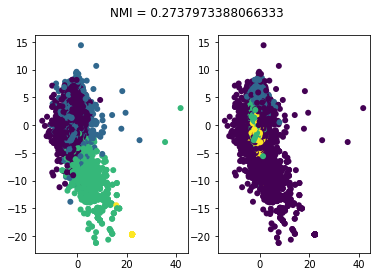

In [ ]:
eval_clustering_2D(X_reduced, pred_labels4, labels_num)

ii. Glove

In [ ]:
rkm = fcps.TandemClustering(X_glove,k4,Type="Factorial", PlotIt=False,ndim=3, nstart=10)
pred_labels4 = rkm[0]
X_reduced= rkm[1][0]


  |======================================================================| 100%

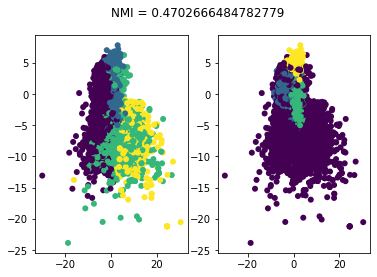

In [ ]:
eval_clustering_2D(X_reduced, pred_labels4, labels_num)

B. Dataset BBC

i. Word2Vec

In [ ]:
rkm = fcps.TandemClustering(X_word2vecb,kb,Type="Factorial", PlotIt=False,ndim=3, nstart=10)
pred_labelsb = rkm[0]
X_reduced_b= rkm[1][0]

  |======================================================================| 100%

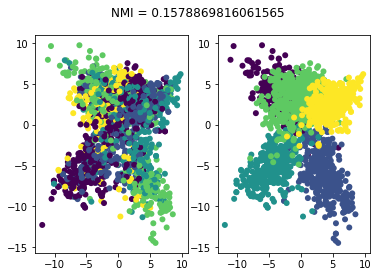

In [ ]:
eval_clustering_2D(X_reduced_b, pred_labelsb, labels_numb)

ii.Glove

In [ ]:
rkm = fcps.TandemClustering(x_glove_b,kb,Type="Factorial", PlotIt=False,ndim=3, nstart=10)
pred_labelsb = rkm[0]
X_reduced_b= rkm[1][0]

  |======================================================================| 100%

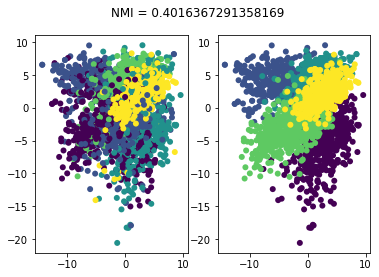

In [ ]:
eval_clustering_2D(X_reduced_b, pred_labelsb, labels_numb)

### Remarque
> Nous remarquons que pour les deux datasets, la NMI obtenue pour la représentation Glove est meilleure que la NMI obtenue pour  word2vec.   

Importation des méthodes de DCn et DKN :

In [ ]:
import os
import math
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.cluster import KMeans
from tqdm import tqdm

"""
  Credits:
    This code is based on the implementation provided by Maziar Moradi Fard and Thibaut Thonet
    Available in: https://github.com/MaziarMF/deep-k-means
"""

TF_FLOAT_TYPE = tf.float32

tf.disable_eager_execution()

def fc_layers(input, specs):
    [dimensions, activations, names] = specs
    for dimension, activation, name in zip(dimensions, activations, names):
        input = tf.layers.dense(inputs=input, units=dimension, activation=activation, name=name, reuse=tf.AUTO_REUSE)
    return input

def autoencoder(input, specs):
    [dimensions, activations, names] = specs
    mid_ind = int(len(dimensions)/2)

    # Encoder
    embedding = fc_layers(input, [dimensions[:mid_ind], activations[:mid_ind], names[:mid_ind]])
    # Decoder
    output = fc_layers(embedding, [dimensions[mid_ind:], activations[mid_ind:], names[mid_ind:]])

    return embedding, output

def f_func(x, y):
    return tf.reduce_sum(tf.square(x - y), axis=1)

def g_func(x, y):
    return tf.reduce_sum(tf.square(x - y), axis=1)

def next_batch(num, data):
    """
    Return a total of `num` random samples.
    """
    indices = np.arange(0, data.shape[0])
    np.random.shuffle(indices)
    indices = indices[:num]
    batch_data = np.asarray([data[i, :] for i in indices])

    return indices, batch_data


#######################################################
############### Deep Clustering Network ###############
#######################################################

class DcnCompGraph(object):
    """Computation graph for the Deep Clustering Network model proposed in:
        Yang, B., Fu, X., Sidiropoulos, N. D., & Hong, M. (2017). Towards K-means-friendly Spaces: Simultaneous Deep
        Learning and Clustering. In ICML '17 (pp. 3861–3870).
    This implementation is inspired by https://github.com/boyangumn/DCN
    """

    def __init__(self, ae_specs, n_clusters, batch_size, n_samples, val_lambda):
        input_size = ae_specs[0][-1]
        embedding_size = ae_specs[0][int((len(ae_specs[0]) - 1) / 2)]

        # Placeholder tensor for input data
        self.input = tf.placeholder(dtype=TF_FLOAT_TYPE, shape=(batch_size, input_size))

        # Auto-encoder loss computations
        self.embedding, self.output = autoencoder(self.input, ae_specs)  # Get the auto-encoder's embedding and output
        rec_error = g_func(self.input, self.output)  # Reconstruction error based on distance g
        self.ae_loss = tf.reduce_mean(rec_error)

        # Clustering loss computations
        ## Tensor for cluster representatives
        minval_rep, maxval_rep = -1, 1
        self.cluster_rep = tf.Variable(tf.random_uniform([n_clusters, embedding_size],
                                                    minval=minval_rep, maxval=maxval_rep,
                                                    dtype=TF_FLOAT_TYPE), name='cluster_rep', dtype=TF_FLOAT_TYPE)

        ## Clustering assignments for all samples in the dataset
        initial_clustering_assign = tf.random_uniform(minval=0, maxval=n_clusters, dtype=tf.int32, shape=[n_samples])
        self.cluster_assign = tf.Variable(initial_clustering_assign, name='cluster_assign', dtype=tf.int32, trainable=False)

        ## Get the cluster representative corresponding to the cluster of each batch sample
        self.indices = tf.placeholder(dtype=tf.int32, shape=batch_size)  # Placeholder for sample indices in current batch
        batch_clust_rep = []
        for j in range(batch_size):
            k = self.cluster_assign[self.indices[j]]  # Clustering assignment for sample j in batch
            batch_clust_rep.append(self.cluster_rep[k, :])
        stack_batch_clust_rep = tf.stack(batch_clust_rep)

        ## Compute the k-means term
        clustering_error = f_func(self.embedding, stack_batch_clust_rep)

        # Compute the full loss combining the reconstruction error and k-means term
        self.ae_loss = tf.reduce_mean(rec_error)
        self.kmeans_loss = tf.reduce_mean(clustering_error)
        self.loss = self.ae_loss + val_lambda * self.kmeans_loss

        # The optimizer is defined to minimize this loss
        optimizer = tf.train.AdamOptimizer()
        self.pretrain_op = optimizer.minimize(self.ae_loss) # Pretrain the autoencoder before starting DCN
        self.train_op = optimizer.minimize(self.loss)

        # As it has been pointed out in the DCN paper, first the weights of the autoencoder shall be trained then the
        # assignments and cluster representatives. So far in the computation graph we have optimized the weights of the
        # autoencoder, now it's the time for the assignments and representatives.

        # Update the clustering assignments
        for j in range(batch_size):
            # Find which cluster representative is the closest to the current batch sample
            new_assign = tf.argmin(f_func(tf.reshape(self.embedding[j, :], (1, embedding_size)), self.cluster_rep),
                                   output_type=tf.int32)
            # Update the clustering assignment
            self.cluster_assign_update = tf.assign(self.cluster_assign[self.indices[j]], new_assign)

        # Update the cluster representatives
        ## Initialize the value of count
        initial_count = tf.constant(100.0, shape=[n_clusters])
        count = tf.Variable(initial_count, name='count', dtype=TF_FLOAT_TYPE, trainable=False)
        ## Update the cluster representatives according to Equation (8) in the DCN paper
        for j in range(batch_size):
            k = self.cluster_assign[self.indices[j]]  # Clustering assignment for sample j in batch
            self.count_update = tf.assign(count[k], count[k] + 1)  # Updated count for cluster assignments
            new_rep = self.cluster_rep[k] - (1 / count[k]) * (self.cluster_rep[k] - self.embedding[j])
            self.cluster_rep_update = tf.assign(self.cluster_rep[k], new_rep)

def DCN(data, n_clusters, n_components, n_pretrain_epochs=50, n_finetuning_epochs=50, lambda_=1.0, batch_size=256, seed=None, cpu=False):
    # Auto-encoder architecture
    input_size = data.shape[1]
    hidden_1_size = 500
    hidden_2_size = 500
    hidden_3_size = 2000
    embedding_size = n_components
    dimensions = [hidden_1_size, hidden_2_size, hidden_3_size, embedding_size, # Encoder layer dimensions
                  hidden_3_size, hidden_2_size, hidden_1_size, input_size] # Decoder layer dimensions
    activations = [tf.nn.relu, tf.nn.relu, tf.nn.relu, None, # Encoder layer activations
                  tf.nn.relu, tf.nn.relu, tf.nn.relu, None] # Decoder layer activations
    names = ['enc_hidden_1', 'enc_hidden_2', 'enc_hidden_3', 'embedding', # Encoder layer names
            'dec_hidden_1', 'dec_hidden_2', 'dec_hidden_3', 'output'] # Decoder layer names

    n_samples = data.shape[0]
    n_batches = int(math.ceil(n_samples / batch_size)) # Number of mini-batches
    pretrain = True # Specify if DKM's autoencoder should be pretrained

    # Hardware specifications
    if cpu:
        os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Run on CPU instead of GPU if batch_size is small
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.05)

    if seed is not None:
      tf.reset_default_graph()
      tf.set_random_seed(seed)
      np.random.seed(seed)

    cg = DcnCompGraph([dimensions, activations, names], n_clusters, batch_size, n_samples,
                      lambda_)

    # Run the computation graph
    with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
        # Initialization
        init = tf.global_variables_initializer()
        sess.run(init)

        # Pretrain if specified
        if pretrain:
            print("Starting autoencoder pretraining...")

            # Variables to save pretraining tensor content
            embeddings = np.zeros((n_samples, embedding_size), dtype=float)

            # First, pretrain the autoencoder
            ## Loop over epochs
            for _ in tqdm(range(n_pretrain_epochs)):

                # Loop over the samples
                for _ in range(n_batches):
                    # Fetch a random data batch of the specified size
                    indices_, data_batch = next_batch(batch_size, data)

                    # Run the computation graph until pretrain_op (only on autoencoder) on the data batch
                    _, embedding_, ae_loss_ = sess.run((cg.pretrain_op, cg.embedding, cg.ae_loss),
                                                       feed_dict={cg.input: data_batch})

                    # Save the embeddings for batch samples
                    for j in range(len(indices_)):
                        embeddings[indices_[j], :] = embedding_[j, :]

            # Second, run k-means++ on the pretrained embeddings
            print("Running k-means on the learned embeddings...")
            kmeans_model = KMeans(n_clusters=n_clusters, init="k-means++").fit(embeddings)

            # The cluster centers are used to initialize the cluster representatives in DCN
            sess.run(tf.assign(cg.cluster_rep, kmeans_model.cluster_centers_))

            # The clustering assignments are used to initialize the clustering assignments in DCN
            sess.run(tf.assign(cg.cluster_assign, kmeans_model.labels_))

        # Train the full DCN model
        print("Starting DCN training...")
        ## Loop over epochs
        for epoch in tqdm(range(n_finetuning_epochs)):
            # print("Training step: epoch {}".format(epoch))

            # Loop over the samples
            for _ in range(n_batches):
                # Fetch a random data batch of the specified size
                indices_, data_batch = next_batch(batch_size, data)

                # Run the computation graph on the data batch
                _, _, _, _, loss_, cluster_assign_, ae_loss_, kmeans_loss_ =\
                    sess.run((cg.train_op, cg.cluster_assign_update, cg.count_update, cg.cluster_rep_update, cg.loss,
                              cg.cluster_assign, cg.ae_loss, cg.kmeans_loss),
                             feed_dict={cg.input: data_batch, cg.indices: indices_})
        
        embeddings = np.zeros((n_samples, embedding_size), dtype=float)
        for _ in range(n_batches):
            # Fetch a random data batch of the specified size
            indices_, data_batch = next_batch(batch_size, data)

            # Run the computation graph on the data batch
            _, _, embeddings_, _, _, loss_, cluster_assign_, ae_loss_, kmeans_loss_ =\
                sess.run((cg.train_op, cg.cluster_assign_update, cg.embedding, cg.count_update, cg.cluster_rep_update, cg.loss,
                          cg.cluster_assign, cg.ae_loss, cg.kmeans_loss),
                          feed_dict={cg.input: data_batch, cg.indices: indices_})

            for j in range(len(indices_)):
                embeddings[indices_[j], :] = embeddings_[j, :]
                
    return embeddings, cluster_assign_


#######################################################
##################### Deep K-means ####################
#######################################################

class DkmCompGraph(object):
    """Computation graph for Deep K-Means
    """

    def __init__(self, ae_specs, n_clusters, val_lambda):
        input_size = ae_specs[0][-1]
        embedding_size = ae_specs[0][int((len(ae_specs[0])-1)/2)]

        # Placeholder tensor for input data
        self.input = tf.placeholder(dtype=TF_FLOAT_TYPE, shape=(None, input_size))

        # Auto-encoder loss computations
        self.embedding, self.output = autoencoder(self.input, ae_specs)  # Get the auto-encoder's embedding and output
        rec_error = g_func(self.input, self.output)  # Reconstruction error based on distance g

        # k-Means loss computations
        ## Tensor for cluster representatives
        minval_rep, maxval_rep = -1, 1
        self.cluster_rep = tf.Variable(tf.random_uniform([n_clusters, embedding_size],
                                                    minval=minval_rep, maxval=maxval_rep,
                                                    dtype=TF_FLOAT_TYPE), name='cluster_rep', dtype=TF_FLOAT_TYPE)

        ## First, compute the distance f between the embedding and each cluster representative
        list_dist = []
        for i in range(0, n_clusters):
            dist = f_func(self.embedding, tf.reshape(self.cluster_rep[i, :], (1, embedding_size)))
            list_dist.append(dist)
        self.stack_dist = tf.stack(list_dist)

        ## Second, find the minimum squared distance for softmax normalization
        min_dist = tf.reduce_min(list_dist, axis=0)

        ## Third, compute exponentials shifted with min_dist to avoid underflow (0/0) issues in softmaxes
        self.alpha = tf.placeholder(dtype=TF_FLOAT_TYPE, shape=())  # Placeholder tensor for alpha
        list_exp = []
        for i in range(n_clusters):
            exp = tf.exp(-self.alpha * (self.stack_dist[i] - min_dist))
            list_exp.append(exp)
        stack_exp = tf.stack(list_exp)
        sum_exponentials = tf.reduce_sum(stack_exp, axis=0)

        ## Fourth, compute softmaxes and the embedding/representative distances weighted by softmax
        list_softmax = []
        list_weighted_dist = []
        for j in range(n_clusters):
            softmax = stack_exp[j] / sum_exponentials
            weighted_dist = self.stack_dist[j] * softmax
            list_softmax.append(softmax)
            list_weighted_dist.append(weighted_dist)
        stack_weighted_dist = tf.stack(list_weighted_dist)

        # Compute the full loss combining the reconstruction error and k-means term
        self.ae_loss = tf.reduce_mean(rec_error)
        self.kmeans_loss = tf.reduce_mean(tf.reduce_sum(stack_weighted_dist, axis=0))
        self.loss = self.ae_loss + val_lambda * self.kmeans_loss

        # The optimizer is defined to minimize this loss
        optimizer = tf.train.AdamOptimizer()
        self.pretrain_op = optimizer.minimize(self.ae_loss) # Pretrain the autoencoder before starting DKM
        self.train_op = optimizer.minimize(self.loss) # Train the whole DKM model

def DKM(data, n_clusters, n_components, n_pretrain_epochs=50, n_finetuning_epochs=5, lambda_=1.0, batch_size=256, seed=None, cpu=False):
    """
        The final number of finetuning epochs is n_finetuning_epochs * 20 if pretrain and n_finetuning_epochs * 40 if annealing
    """
    # Auto-encoder architecture
    input_size = data.shape[1]
    hidden_1_size = 500
    hidden_2_size = 500
    hidden_3_size = 2000
    embedding_size = n_components
    dimensions = [hidden_1_size, hidden_2_size, hidden_3_size, embedding_size, # Encoder layer dimensions
                  hidden_3_size, hidden_2_size, hidden_1_size, input_size] # Decoder layer dimensions
    activations = [tf.nn.relu, tf.nn.relu, tf.nn.relu, None, # Encoder layer activations
                  tf.nn.relu, tf.nn.relu, tf.nn.relu, None] # Decoder layer activations
    names = ['enc_hidden_1', 'enc_hidden_2', 'enc_hidden_3', 'embedding', # Encoder layer names
            'dec_hidden_1', 'dec_hidden_2', 'dec_hidden_3', 'output'] # Decoder layer names

    n_samples = data.shape[0]
    n_batches = int(math.ceil(n_samples / batch_size)) # Number of mini-batches
    pretrain = True # Specify if DKM's autoencoder should be pretrained
    annealing = False # Specify if annealing should be used

    # Define the alpha scheme depending on if the approach includes annealing/pretraining
    if annealing and not pretrain:
        constant_value = 1  # specs.embedding_size # Used to modify the range of the alpha scheme
        max_n = 40  # Number of alpha values to consider
        alphas = np.zeros(max_n, dtype=float)
        alphas[0] = 0.1
        for i in range(1, max_n):
            alphas[i] = (2 ** (1 / (np.log(i + 1)) ** 2)) * alphas[i - 1]
        alphas = alphas / constant_value
    elif not annealing and pretrain:
        constant_value = 1  # specs.embedding_size # Used to modify the range of the alpha scheme
        max_n = 20  # Number of alpha values to consider (constant values are used here)
        alphas = 1000*np.ones(max_n, dtype=float) # alpha is constant
        alphas = alphas / constant_value
    else:
        raise Exception("Run with either annealing (-a) or pretraining (-p), but not both.")

    # Hardware specifications
    if cpu:
        os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # Run on CPU instead of GPU if batch_size is small

    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.05)
    config = tf.ConfigProto(gpu_options=gpu_options)

    if seed is not None:
      tf.reset_default_graph()
      tf.set_random_seed(seed)
      np.random.seed(seed)
      
    # Define the computation graph for DKM
    cg = DkmCompGraph([dimensions, activations, names], n_clusters, lambda_)

    # Run the computation graph
    with tf.Session(config=config) as sess:
        # Initialization
        init = tf.global_variables_initializer()
        sess.run(init)

        # Variables to save tensor content
        distances = np.zeros((n_clusters, n_samples))

        # Pretrain if specified
        if pretrain:
            print("Starting autoencoder pretraining...")

            # Variables to save pretraining tensor content
            embeddings = np.zeros((n_samples, embedding_size), dtype=float)

            # First, pretrain the autoencoder
            ## Loop over epochs
            for _ in tqdm(range(n_pretrain_epochs)):
                # Loop over the samples
                for _ in range(n_batches):
                    # Fetch a random data batch of the specified size
                    indices, data_batch = next_batch(batch_size, data)

                    # Run the computation graph until pretrain_op (only on autoencoder) on the data batch
                    _, embedding_, ae_loss_ = sess.run((cg.pretrain_op, cg.embedding, cg.ae_loss),
                                                        feed_dict={cg.input: data_batch})

                    # Save the embeddings for batch samples
                    for j in range(len(indices)):
                        embeddings[indices[j], :] = embedding_[j, :]

            # Second, run k-means++ on the pretrained embeddings
            print("Running k-means on the learned embeddings...")
            kmeans_model = KMeans(n_clusters=n_clusters, init="k-means++").fit(embeddings)

            # The cluster centers are used to initialize the cluster representatives in DKM
            sess.run(tf.assign(cg.cluster_rep, kmeans_model.cluster_centers_))

        # Train the full DKM model
        if (len(alphas) > 0):
            print("Starting DKM training...")
        ## Loop over alpha (inverse temperature), from small to large values
        for k in tqdm(range(len(alphas))):
            # Loop over epochs per alpha
            for _ in range(n_finetuning_epochs):
                # Loop over the samples
                for _ in range(n_batches):
                    # Fetch a random data batch of the specified size
                    indices, data_batch = next_batch(batch_size, data)

                    # Run the computation graph on the data batch
                    _, loss_, stack_dist_, cluster_rep_, ae_loss_, kmeans_loss_ =\
                        sess.run((cg.train_op, cg.loss, cg.stack_dist, cg.cluster_rep, cg.ae_loss, cg.kmeans_loss),
                                  feed_dict={cg.input: data_batch, cg.alpha: alphas[k]})

                    # Save the distances for batch samples
                    for j in range(len(indices)):
                        distances[:, indices[j]] = stack_dist_[:, j]

        _, loss_, X_reduced, stack_dist_, cluster_rep_, ae_loss_, kmeans_loss_ =\
        sess.run((cg.train_op, cg.loss, cg.embedding, cg.stack_dist, cg.cluster_rep, cg.ae_loss, cg.kmeans_loss),
                  feed_dict={cg.input: data, cg.alpha: alphas[k]})

        distances = stack_dist_

        # Infer cluster assignments for all samples
        cluster_assign = np.zeros((n_samples), dtype=float)
        for i in range(n_samples):
            index_closest_cluster = np.argmin(distances[:, i])
            cluster_assign[i] = index_closest_cluster
        cluster_assign = cluster_assign.astype(np.int64)

    return X_reduced, cluster_assign

## 3. Deep Clustering Network (DCN)
> Deep clusting network est une méthode repose sur l’adoption d’une fonction non linéaire pour l’obtention des échantillons de données. Pour récupérer les représentations latentes " favorables au clustering " et pour mieux regrouper les données,  une approche conjointe de DR et de regroupement K-means. K-means dans laquelle la DR est réalisée par l'apprentissage d'un réseau neuronal profond (DNN) [[Yang et al,. 2017](http://proceedings.mlr.press/v70/yang17b/yang17b.pdf)].

A. Dataset classic4

In [ ]:
tf.reset_default_graph()

In [ ]:
dcn_classic4_word2vec = DCN(X_word2vec,k4,2)
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

`tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.

/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning:

`layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.



Starting autoencoder pretraining...


100%|██████████| 50/50 [02:13<00:00,  2.67s/it]


Running k-means on the learned embeddings...
Starting DCN training...


100%|██████████| 50/50 [02:25<00:00,  2.90s/it]


i. Word2vec

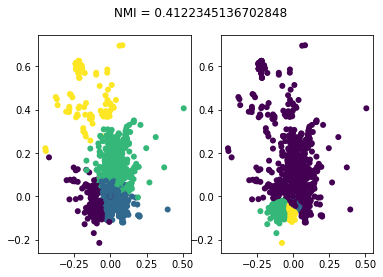

In [ ]:
pred_labels = dcn_classic4_word2vec[1]
X_reduced = dcn_classic4_word2vec[0]
eval_clustering_2D(X_reduced, pred_labels, labels_num)

ii. Glove

In [ ]:
tf.reset_default_graph()

In [ ]:
dcn_classic4_glove = DCN(X_glove,k4,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

`tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.

/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning:

`layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.



Starting autoencoder pretraining...


100%|██████████| 50/50 [03:01<00:00,  3.64s/it]


Running k-means on the learned embeddings...
Starting DCN training...


100%|██████████| 50/50 [04:03<00:00,  4.87s/it]


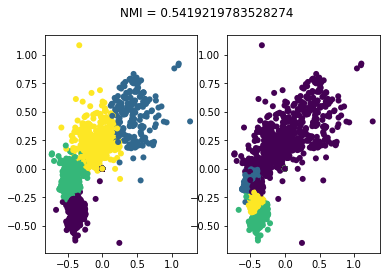

In [ ]:
pred_labels = dcn_classic4_glove[1]
X_reduced = dcn_classic4_glove[0]
eval_clustering_2D(X_reduced, pred_labels, labels_num)

B. Dataset  BBC

i. word2vec

In [ ]:
tf.reset_default_graph()

In [ ]:
dcn_bbc_word2vec = DCN(X_word2vecb,kb,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

`tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.

/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning:

`layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.

100%|██████████| 50/50 [00:52<00:00,  1.05s/it]


Running k-means on the learned embeddings...
Starting DCN training...


100%|██████████| 50/50 [01:01<00:00,  1.22s/it]


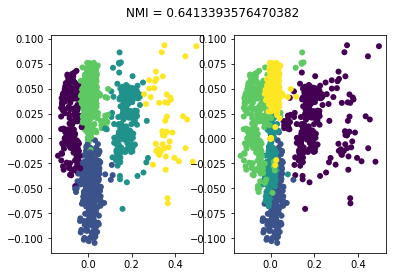

In [ ]:
pred_labels_b = dcn_bbc_word2vec[1]
X_reduced_b = dcn_bbc_word2vec[0]
eval_clustering_2D(X_reduced_b, pred_labels_b, labels_numb)

ii. Glove

In [ ]:
tf.reset_default_graph()

In [ ]:
dcn_bbc_glove = DCN(x_glove_b,kb,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

`tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.

/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning:

`layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.



Starting autoencoder pretraining...


100%|██████████| 50/50 [00:44<00:00,  1.13it/s]


Running k-means on the learned embeddings...
Starting DCN training...


100%|██████████| 50/50 [01:58<00:00,  2.37s/it]


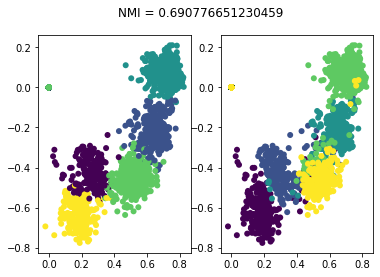

In [ ]:
pred_labels_b = dcn_bbc_glove[1]
X_reduced_b = dcn_bbc_glove[0]
eval_clustering_2D(X_reduced_b, pred_labels_b, labels_numb)

### Remarque 
>Les résultats obtenus (NMI) pour le dataset bbc sont meilleurs que les résultats obtenus pour les dataset classic4 pour les deux représentations.

## 4. Deep k-means (DKM) 

>Un algorithme qui fait  le clustering et la réduction de dimension simultanément. L’approche repose sur le clustring k-means avec une reparamétrisation  de la fonction continue de la fonction objectif [[Shudonfg et al,. 2020](https://www.researchgate.net/publication/343608154_Deep_K-Means_A_Simple_and_Effective_Method_for_Data_Clustering)].



A. Dataset classic 4

i. word2vec

In [ ]:
tf.reset_default_graph()

In [ ]:
dkm_classic4_word2vec= DKM(X_word2vec,k4,2)

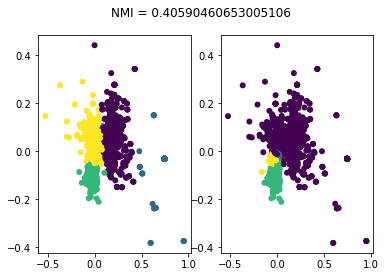

In [ ]:
pred_labels = dkm_classic4_word2vec[1]
X_reduced = dkm_classic4_word2vec[0]
eval_clustering_2D(X_reduced, pred_labels, labels_num)

ii. Glove

In [ ]:
tf.reset_default_graph()

In [ ]:
dkm_classic4_glove = DKM(X_glove,k4,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

`tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.

/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning:

`layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.



Starting autoencoder pretraining...


100%|██████████| 50/50 [03:28<00:00,  4.18s/it]


Running k-means on the learned embeddings...
Starting DKM training...


100%|██████████| 20/20 [06:57<00:00, 20.89s/it]


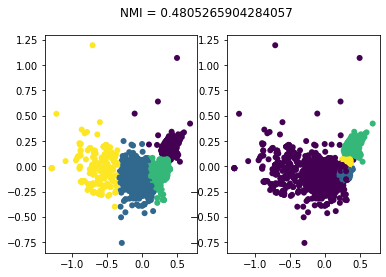

In [ ]:
pred_labels = dkm_classic4_glove[1]
X_reduced = dkm_classic4_glove[0]
eval_clustering_2D(X_reduced, pred_labels, labels_num)

B. Dataset BBC

i. word2vec

In [ ]:
tf.reset_default_graph()

In [ ]:
dkm_bbc_word2vec= DKM(x_glove_b,kb,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

`tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.

/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning:

`layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.



Starting autoencoder pretraining...


100%|██████████| 50/50 [01:07<00:00,  1.35s/it]


Running k-means on the learned embeddings...
Starting DKM training...


100%|██████████| 20/20 [02:15<00:00,  6.79s/it]


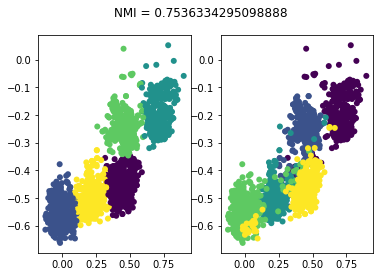

In [ ]:
pred_labels_b = dkm_bbc_word2vec[1]
X_reduced_b = dkm_bbc_word2vec[0]
eval_clustering_2D(X_reduced_b, pred_labels_b, labels_numb)

ii. Glove

In [ ]:
tf.reset_default_graph()

In [ ]:
dkm_bbc_glove= DKM(x_glove_b,kb,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning:

`tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.

/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:255: UserWarning:

`layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.



Starting autoencoder pretraining...


100%|██████████| 50/50 [00:54<00:00,  1.08s/it]


Running k-means on the learned embeddings...
Starting DKM training...


100%|██████████| 20/20 [01:48<00:00,  5.44s/it]


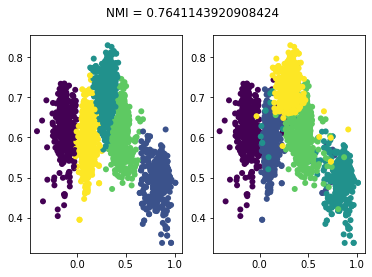

In [ ]:
pred_labels_b = dkm_bbc_glove[1]
X_reduced_b = dkm_bbc_glove[0]
eval_clustering_2D(X_reduced_b, pred_labels_b, labels_numb)

### Remarque 

>Nous remarquons que les résultats obtenus pour DKM sont meilleurs que les résultats obtenus pour les K-means avec toutes les méthodes de réduction particulièrement avec L’ACP (vu que dans la littérature, on appliquait le k-means simple avec l’ACP) avec le dataset bbc (en comparant la NMI). Néanmoins, pour le dataset classic 4,  la NMI obtenue en appliquant les méthodes de réduction (ACP, TSNE, UMAP, Autoencoder) et le k-means séparément est plus grande que la NMI obtenue avec DKM et cela pour les deux représentation (glove et word2vec). 

> De ce fait, nous pouvons, poser l’hypothèse suivant, plus un jeu de données est volumineux plus DKM est moins performant que l’application des méthodes de réduction ensuite un k-means séparément. 


```
# Ce texte est au format code
```

##Interprétation : 

---



> L'étude de simulation a confirmé que, tant pour le FKM que pour le RKM, la récupération de l'appartenance à une classe se détériore généralement avec l'augmentation de la quantité de chevauchement entre les classes. En outre, les conjectures ont été confirmées que pour la FKM, la récupération du sous-espace se détériore avec l'augmentation de la taille relative des résidus du sous-espace par rapport aux résidus du complément, et que l'inverse est vrai pour la RKM  et que lorsque la majorité des variables reflètent la structure de clustering, et/ou que des variables standardisées sont analysées, on peut s'attendre à ce que la RKM soit raisonnablement performante.[[Marieke et al,. 2010](https://www.researchgate.net/publication/46493849_Factorial_and_reduced_K-means_reconsidered)].  D’après cette analyse,  nous pouvons expliquer les résultats obtenus pour les deux datasets, clairement  le RKM est performant par rapport au FKM pour les deux datasets avec les deux représentations.   
 

>Le tableau suivant résume les NMI obtenues pour chaque méthode et pour chaque datset, nous avons obtenu une meilleure qualité de classification avec le DKM.

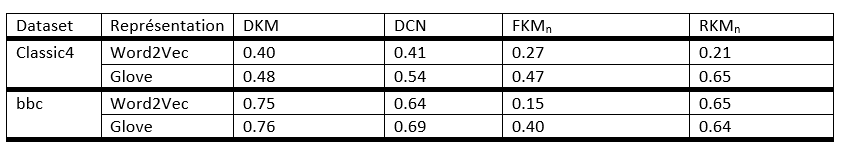

# Comparaison entre les méthodes de clustering K-means de la partie 1 et les k-means de la partie 2

Le tableau suivant représente les NMIs obtenus par le K-means avec les différentes méthodes de réduction (ACP, UMAP, etc) pour les deux datasets avec les deux représentation (Glove et word2vec)

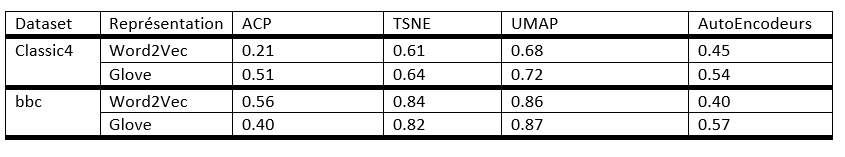

Le tableau suivant représente les NMIs obtenus par les K-means de la deuxième partie pour les deux datasets avec les deux représentations (Glove et word2vec)

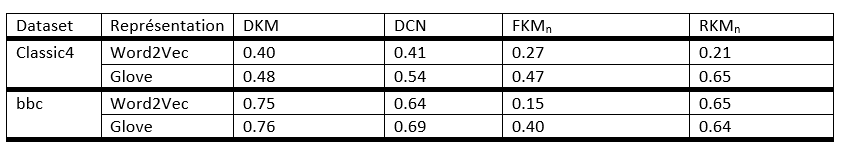

Nous remarquons à partir des résultats précédents que la méthode k-means avec UMAP donne une méilleure qualité de classification pour pour les deux datasets classic4 et bbc. Si nous éssayons d'ordonner  les méthodes par rapport à leur qualité de classification, nous pouvons avoir la classification suivante : 


1.   K-means avec UMAP
2.   K-means avec TSNE
3.   DKM

Contrairement à ce que nous avons trouvé dans la littérature, "les méthodes qui font la réduction et le clustring simultanément sont plus performantes que l'application d'un k-means classique avec une méthode de réduction", il s'avère que pour nos deux jeux de données, le k-means classique est plus performant pour la métrique NMI.


